# Example of how to use the environment

Define two random agents.

In [1]:
from environment import truly_dynamic_environment, replay, visualize
import numpy as np
from test import minimax_agent1
from agent_pmcs_owen_fast import FastPMCSAgent
# examples as class
class RandomAgent1:
    def agent_function(board, player): 
        """A random agent."""
        return np.random.choice(np.where(board[0]==0)[0])

# example as function
def random_agent2(board, player): 
    """Another random agent."""
    return np.random.choice(np.where(board[0]==0)[0])

pmcs_agent = FastPMCSAgent()

players = [
    {
        "algo": minimax_agent1,
        "name": "Ritik",
        "player": +1,
        "args": {}
    },
    {
        "algo": pmcs_agent.act,
        "name": "Owen",
        "player": -1,
        "args": {}
    }
]

Run the game

In [ ]:
from collections import defaultdict
import json
import pickle

runs = []
win_cnt = defaultdict(int)
rounds = []
for _ in range(10):
    result,final_board,all_boards = truly_dynamic_environment(players, size=(6,7), visual=True)
    
    # store results of each runs
    runs.append((result,final_board,all_boards))
    
    round = {}
    if result['winner'] == 1:
        win_cnt[players[0]['name']] += 1
        round = {'winner': players[0]['name']}
    elif result['winner'] == -1:
        win_cnt[players[1]['name']] += 1
        round = {'winner': players[1]['name']}
    else:
        win_cnt['draw'] += 1
    
    # record the time used
    round.update({players[0]['name']: sum(result['algo_info'][players[0]['name']]['time'])/1000, 
                      players[1]['name']: sum(result['algo_info'][players[1]['name']]['time'])/1000})
    rounds.append(round)
    # store the win counter and used times to file
    with open('win_cnt.json', 'w') as jfile:
        json.dump({'win_cnt': win_cnt, 'rounds': rounds}, jfile, indent=4)
        
    # switch players and make sure the first player uses 1 and the second uses -1 (according to the README)
    players[0], players[1] = players[1], players[0]
    players[0]['player'] *= -1
    players[1]['player'] *= -1

# dump runs into file
with open('runs.pkl', 'wb') as f:
    pickle.dump(runs, f)

win_cnt

Slow replay

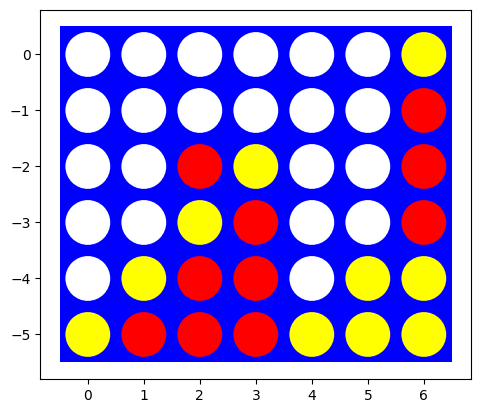

In [3]:
replay(all_boards)